# Assignment 1
## Question1

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

#### a) How many one-garage apartments have a totalprice greater than 400,000 euros?

In [2]:
df = pd.read_csv("vitoria2006.csv")

In [3]:
a = df[(df["garage"] == 1) & (df["totalprice"] > 400000)]
a

,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,storage
1,409000.0,100.650002,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1
12,560000.0,155.899994,Z21,2B,7,4,6,E100,1A,2,1,1,S4,3B,1
33,403000.0,118.860001,Z41,3A,25,5,6,E100,1A,2,1,1,S4,4A,1
47,426200.0,141.479996,Z42,3A,13,5,5,E100,1A,2,1,1,S5,3A,1
132,457000.0,142.179993,Z42,3A,14,4,6,E100,2A,2,1,1,S4,3A,1
185,433500.0,113.510002,Z41,2B,8,4,5,E100,1A,2,1,1,S4,3B,1


In [4]:
len(a)

6

   #### Ans: 6

#### b)  Build a histogram of relative frequencies of totalprice. Add a normal density curve to the plot. Find the probability that the totalprice of an apartment exceeds 300000 euros if it is assumed to be normally distributed. (Hint: you may want to use library import scipy.stats)

In [6]:
h = sorted(df["totalprice"])
fit = norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed 

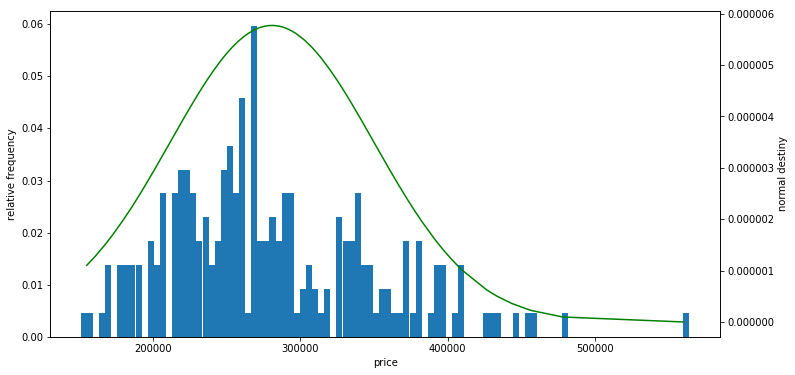

In [103]:
#method 2
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(12)

ax = fig.subplots()
ax2=ax.twinx()
ax.hist(df["totalprice"],normed = 1,bins=100)
res = stats.relfreq(df["totalprice"],100)
x = res.lowerlimit + np.linspace(0, res.binsize*res.frequency.size, res.frequency.size)
ax.bar(x, res.frequency, width=res.binsize)
ax.set_ylabel("relative frequency")
ax.set_xlabel("price")
mean = np.mean(df["totalprice"])
std = np.std(df["totalprice"])
ax2.plot(h,fit,color='g')
ax2.set_ylabel("normal destiny")
plt.show()

In [9]:
df.shape[0]

218

In [11]:
mean = np.mean(df["totalprice"])
std = np.std(df["totalprice"])
cd = norm(mean, std).cdf(300000)*100
answer = 100-cd
print ("answer = {0:.2f}%".format(answer))

answer = 39.03%


#### answer = 39.03%

#### c)  Find the covariance and correlation matrix between all numerical variables
#### Correlation

In [12]:
corr = df.corr()
corr.style.background_gradient().set_precision(2)

,totalprice,area,age,floor,rooms,toilets,garage,elevator,storage
totalprice,1,0.81,-0.27,0.029,0.53,0.69,0.52,0.51,0.27
area,0.81,1,-0.052,0.082,0.64,0.63,0.35,0.39,0.15
age,-0.27,-0.052,1,-0.081,-0.083,-0.28,-0.21,-0.41,-0.27
floor,0.029,0.082,-0.081,1,0.13,0.1,-0.03,0.2,-0.12
rooms,0.53,0.64,-0.083,0.13,1,0.42,0.21,0.35,0.033
toilets,0.69,0.63,-0.28,0.1,0.42,1,0.45,0.45,0.22
garage,0.52,0.35,-0.21,-0.03,0.21,0.45,1,0.27,0.16
elevator,0.51,0.39,-0.41,0.2,0.35,0.45,0.27,1,0.21
storage,0.27,0.15,-0.27,-0.12,0.033,0.22,0.16,0.21,1


#### Covariance

In [13]:
cov = df.cov()
cov.style.background_gradient().set_precision(2)

,totalprice,area,age,floor,rooms,toilets,garage,elevator,storage
totalprice,4.8e+09,1.2e+06,-2.8e+05,4.3e+03,2.3e+04,2.4e+04,1.6e+04,1.4e+04,7.5e+03
area,1.2e+06,4.3e+02,-16,3.6,8.4,6.5,3.3,3.3,1.3
age,-2.8e+05,-16,2.1e+02,-2.5,-0.77,-2,-1.4,-2.4,-1.6
floor,4.3e+03,3.6,-2.5,4.5,0.18,0.11,-0.029,0.17,-0.1
rooms,2.3e+04,8.4,-0.77,0.18,0.4,0.13,0.059,0.09,0.0085
toilets,2.4e+04,6.5,-2,0.11,0.13,0.25,0.1,0.09,0.044
garage,1.6e+04,3.3,-1.4,-0.029,0.059,0.1,0.2,0.049,0.029
elevator,1.4e+04,3.3,-2.4,0.17,0.09,0.09,0.049,0.16,0.035
storage,7.5e+03,1.3,-1.6,-0.1,0.0085,0.044,0.029,0.035,0.17


#### d) Make a scatterplot of totalprice and area. Report the row number, totalprice and area of the largest outlier.

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#### if x is totalprice and y is area

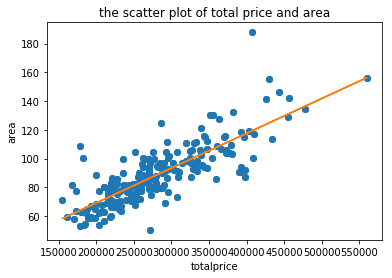

In [76]:
plt.scatter(df.totalprice,df.area)
plt.title("the scatter plot of total price and area")
x = df.totalprice
y = df.area
plt.xlabel("totalprice")
plt.ylabel("area")
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.plot(x, y,'o',x,slope*x+intercept)
plt.show()

In [73]:
df['gap']=abs(y-(slope*x+intercept))
df.sort_values(by='gap')[-1:]

,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,storage,gap
30,407000.0,187.910004,Z31,4,38,3,6,E50,2B,1,0,1,S5,4A,1,68.639764


#### if x is area and y is totalprice

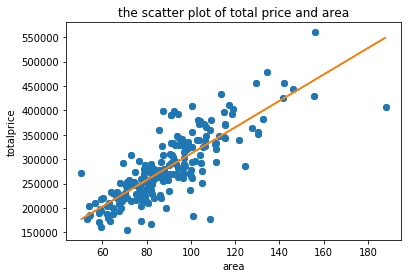

In [77]:
plt.scatter(df.area,df.totalprice)
plt.title("the scatter plot of total price and area")
y = df.totalprice
x = df.area
plt.ylabel("totalprice")
plt.xlabel("area")
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.plot(x, y,'o',x,slope*x+intercept)
plt.show()

In [75]:
df['gap']=abs(y-(slope*x+intercept))
df.sort_values(by='gap')[-1:]

,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,storage,gap
43,178000.0,108.440002,Z11,4,118,3,5,E50,2B,1,0,0,S4,3A,1,156125.623818


#### e) Combine the levels 2A and 2B of category to become category 2. Repeat this process with categories 3, 4, and 5. Find the median totalprice of the apartments by category

In [36]:
df["category"] = [x[0] for x in df.category]
df[:5]

,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,storage
0,228000.0,75.309998,Z45,4,33,3,5,E100,2B,1,0,1,S3,3A,0
1,409000.0,100.650002,Z31,3,5,7,5,E50,1A,2,1,1,S5,4A,1
2,200000.0,88.870003,Z52,3,14,8,5,E50,1A,2,0,1,S2,3A,0
3,180000.0,62.610001,Z62,4,41,3,4,E50,2A,1,0,0,S3,1A,0
4,443600.0,146.149994,Z31,3,22,6,7,E100,1A,2,0,1,S4,4A,1


In [37]:
df.pivot_table('totalprice',index='category',aggfunc=np.median)

,totalprice
category,
2,345500.0
3,279000.0
4,224000.0
5,183000.0


### Question2

#### a) Find the date when AAPL stock was at highest price.

In [38]:
q2 = pd.read_csv("quest2.csv")

In [39]:
q2.sort_values(['AAPL'], ascending=[False])[:5]

,Date,AAPL,CVX,IBM,XOM,GS,BA,TEVA,CME
945,2018/10/3,228.523819,120.427116,146.073898,82.368942,223.532120,383.929626,21.610001,171.156342
944,2018/10/2,225.776459,119.879326,146.579178,82.665329,221.854034,378.126129,21.809999,170.229584
924,2018/9/4,224.870499,114.238068,138.885544,76.766129,233.227875,338.862183,22.700001,172.020340
946,2018/10/4,224.506180,120.081146,144.252991,81.823952,223.237717,381.668884,21.840000,176.092499
923,2018/8/31,224.151657,113.844032,139.648239,76.651398,233.375061,335.475983,22.910000,169.766251


#### answer: 2018/10/3

#### b) Plot all daily cumulative returns and find out what would be your wealth had you invested 100 dollars in Jan 2015 in AAPL.

In [40]:
allin = pd.read_csv("quest2.csv",parse_dates=['Date'])
allin[:5]

,Date,AAPL,CVX,IBM,XOM,GS,BA,TEVA,CME
0,2015-01-02,100.755898,92.657646,132.133499,77.444969,181.354660,114.119171,51.704113,73.334999
1,2015-01-05,97.917427,88.954002,130.054398,75.325943,175.692245,113.328804,50.664879,73.751030
2,2015-01-06,97.926666,88.912827,127.249619,74.925484,172.138107,111.993965,50.517735,72.627777
3,2015-01-07,99.299805,88.838737,126.417984,75.684662,174.703430,113.732765,52.623791,73.468124
4,2015-01-08,103.115128,90.871651,129.165680,76.944412,177.492661,115.743813,52.973267,73.809258


In [41]:
Date_col = allin.pop('Date')
allin[:5]

,AAPL,CVX,IBM,XOM,GS,BA,TEVA,CME
0,100.755898,92.657646,132.133499,77.444969,181.354660,114.119171,51.704113,73.334999
1,97.917427,88.954002,130.054398,75.325943,175.692245,113.328804,50.664879,73.751030
2,97.926666,88.912827,127.249619,74.925484,172.138107,111.993965,50.517735,72.627777
3,99.299805,88.838737,126.417984,75.684662,174.703430,113.732765,52.623791,73.468124
4,103.115128,90.871651,129.165680,76.944412,177.492661,115.743813,52.973267,73.809258


In [42]:
net_returns = allin / allin.shift(1) - 1
net_returns[:5]

,AAPL,CVX,IBM,XOM,GS,BA,TEVA,CME
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.028172,-0.039971,-0.015735,-0.027362,-0.031223,-0.006926,-0.020100,0.005673
2,0.000094,-0.000463,-0.021566,-0.005316,-0.020229,-0.011778,-0.002904,-0.015230
3,0.014022,-0.000833,-0.006535,0.010132,0.014903,0.015526,0.041689,0.011571
4,0.038422,0.022883,0.021735,0.016645,0.015966,0.017682,0.006641,0.004643


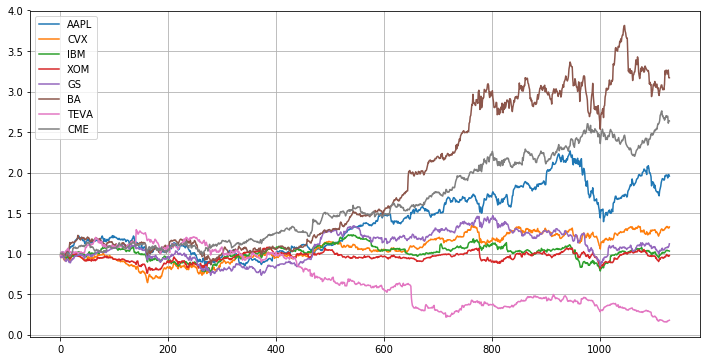

In [43]:
gross_returns = (1 + net_returns).cumprod()
daily_cr = gross_returns.copy()
daily_cr.plot(figsize=(12,6))
plt.grid()

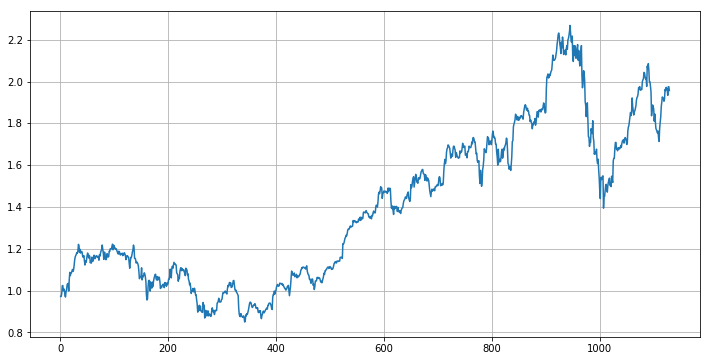

In [44]:
net_returns2 = q2['AAPL'] / q2['AAPL'].shift(1) - 1
gross_returns2 = (1 + net_returns2).cumprod()
gross_returns2.plot(figsize=(12,6))
plt.grid()

In [45]:
start = q2[(q2['Date'] == '2015/1/2')&q2['AAPL']]
start

,Date,AAPL,CVX,IBM,XOM,GS,BA,TEVA,CME
0,2015/1/2,100.755898,92.657646,132.133499,77.444969,181.35466,114.119171,51.704113,73.334999


In [46]:
end = q2[(q2['Date'] == '2019/6/28')&q2['AAPL']]
end

,Date,AAPL,CVX,IBM,XOM,GS,BA,TEVA,CME
1129,2019/6/28,197.170853,123.17379,136.294083,75.688889,203.323929,361.752655,9.23,193.457367


In [47]:
cr = (197.170853/100.755898)-1
cr

0.956916239285565

In [48]:
questionb = (cr+1)*100
questionb 

195.6916239285565

In [84]:
#method2
ar = 100*(1 + net_returns).iloc[:,0:1].cumprod()
ar[-1:]

,AAPL
1129,195.691624


#### answer:195.6916239285565

#### c) Construct a scatter_matrix plot of the net returns for the four stocks most highly correlated.

In [70]:
nn = net_returns.corr()
nn.style.background_gradient().set_precision(2)

,AAPL,CVX,IBM,XOM,GS,BA,TEVA,CME
AAPL,1,0.32,0.39,0.35,0.44,0.44,0.2,0.27
CVX,0.32,1,0.4,0.77,0.45,0.39,0.19,0.27
IBM,0.39,0.4,1,0.42,0.43,0.42,0.23,0.3
XOM,0.35,0.77,0.42,1,0.47,0.41,0.2,0.31
GS,0.44,0.45,0.43,0.47,1,0.49,0.28,0.48
BA,0.44,0.39,0.42,0.41,0.49,1,0.22,0.31
TEVA,0.2,0.19,0.23,0.2,0.28,0.22,1,0.11
CME,0.27,0.27,0.3,0.31,0.48,0.31,0.11,1


#### XOM CVX GS BA most highly correlated

In [71]:
four = pd.DataFrame()
four['XOM'] = q2['XOM'].pct_change()
four['CVX'] = q2['CVX'].pct_change()
four['GS'] = q2['GS'].pct_change()
four['BA'] = q2['BA'].pct_change()

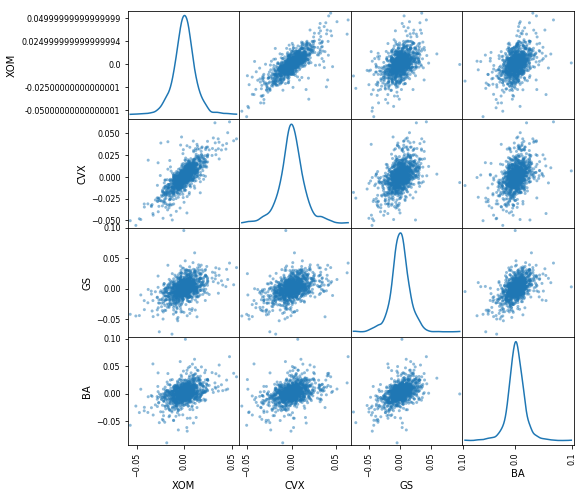

In [72]:
pd.plotting.scatter_matrix(four, diagonal='kde', figsize=(8,8));

#### d) (20 pts.) Construct a 4-in-1 plot that displays for the daily returns of IBM, a line plot (bottom left), a histogram (top right), a quantile-quantile plot (bottom right), and a line plot of the stock prices at the top left corner.

In [52]:
from scipy import stats

In [56]:
close_px = allin.copy()
close_px.index = Date_col
daily_pc = net_returns.copy()  
daily_pc.index = Date_col

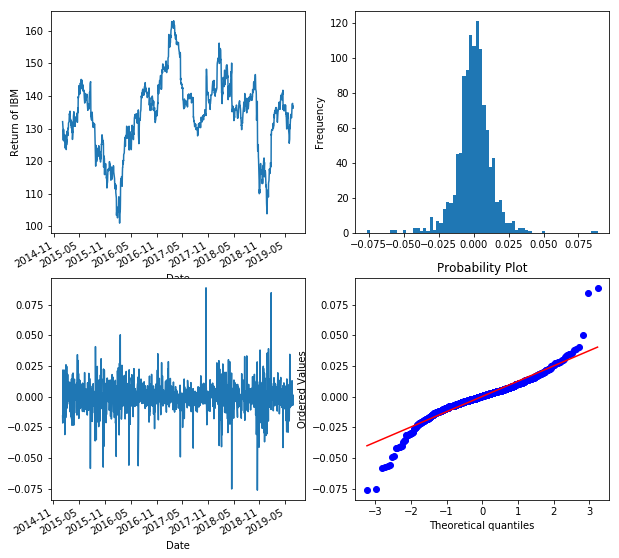

In [67]:
fig = plt.figure()
fig.set(alpha=0.2)
fig.set_figheight(10)
fig.set_figwidth(10)

plt.subplot2grid((2,2),(0,0))
close_px['IBM'].plot(kind='line')
plt.ylabel("Return of IBM")

plt.subplot2grid((2,2),(1,0))
daily_pc["IBM"].plot(kind='line')

plt.subplot2grid((2,2),(0,1))
daily_pc["IBM"].plot(kind='hist',bins=70)

plt.subplot2grid((2,2),(1,1))
stats.probplot(daily_pc["IBM"][1:], dist="norm",plot=plt)
plt.show()